Nilai Kepuasan: 4.6231884057971016


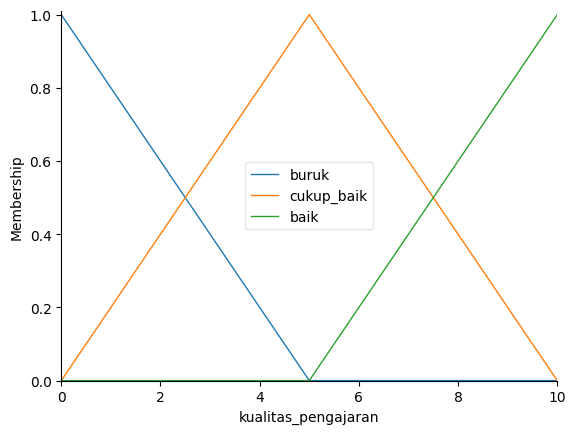

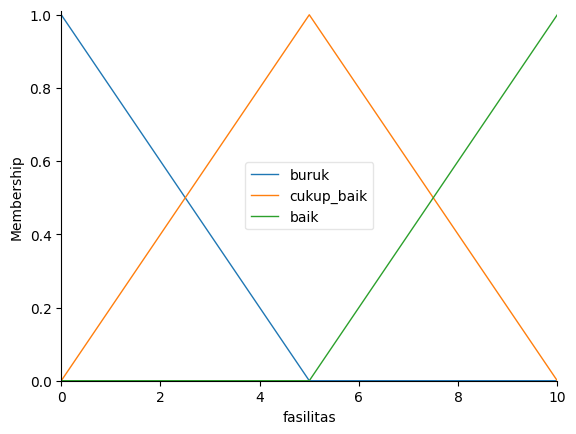

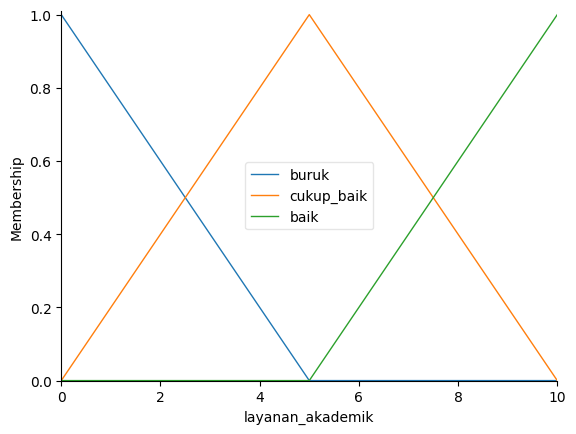

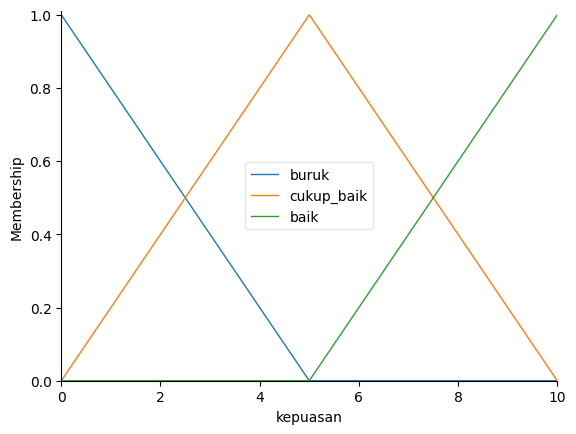

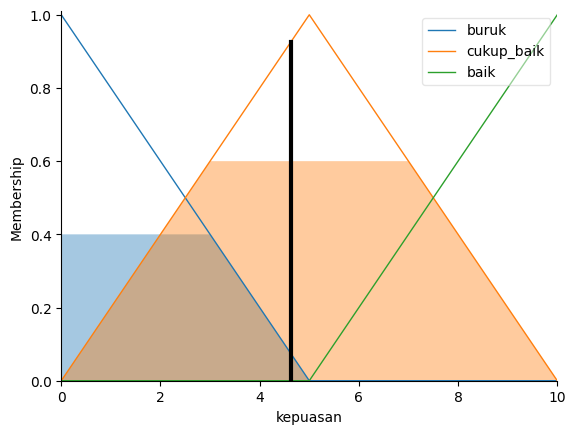

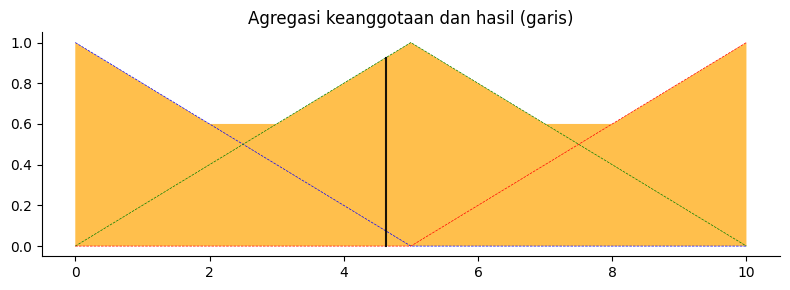

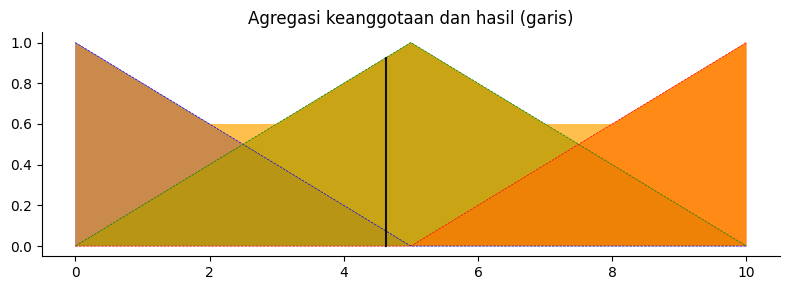

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Mendefinisikan variabel input
kualitas_pengajaran = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_pengajaran')
fasilitas = ctrl.Antecedent(np.arange(0, 11, 1), 'fasilitas')
layanan_akademik = ctrl.Antecedent(np.arange(0, 11, 1), 'layanan_akademik')

# Mendefinisikan variabel output
kepuasan = ctrl.Consequent(np.arange(0, 11, 1), 'kepuasan')

# Mendefinisikan fungsi keanggotaan untuk kualitas_pengajaran
kualitas_pengajaran['buruk'] = fuzz.trimf(kualitas_pengajaran.universe, [0, 0, 5])
kualitas_pengajaran['cukup_baik'] = fuzz.trimf(kualitas_pengajaran.universe, [0, 5, 10])
kualitas_pengajaran['baik'] = fuzz.trimf(kualitas_pengajaran.universe, [5, 10, 10])

# Mendefinisikan fungsi keanggotaan untuk fasilitas
fasilitas['buruk'] = fuzz.trimf(fasilitas.universe, [0, 0, 5])
fasilitas['cukup_baik'] = fuzz.trimf(fasilitas.universe, [0, 5, 10])
fasilitas['baik'] = fuzz.trimf(fasilitas.universe, [5, 10, 10])

# Mendefinisikan fungsi keanggotaan untuk layanan_akademik
layanan_akademik['buruk'] = fuzz.trimf(layanan_akademik.universe, [0, 0, 5])
layanan_akademik['cukup_baik'] = fuzz.trimf(layanan_akademik.universe, [0, 5, 10])
layanan_akademik['baik'] = fuzz.trimf(layanan_akademik.universe, [5, 10, 10])

# Mendefinisikan fungsi keanggotaan untuk kepuasan
kepuasan['buruk'] = fuzz.trimf(kepuasan.universe, [0, 0, 5])
kepuasan['cukup_baik'] = fuzz.trimf(kepuasan.universe, [0, 5, 10])
kepuasan['baik'] = fuzz.trimf(kepuasan.universe, [5, 10, 10])

# Visualisasikan fungsi keanggotaan untuk masing-masing variabel
kualitas_pengajaran.view()
fasilitas.view()
layanan_akademik.view()
kepuasan.view()

# Menentukan aturan fuzzy
rule1 = ctrl.Rule(kualitas_pengajaran['buruk'] | fasilitas['buruk'] | layanan_akademik['buruk'], kepuasan['buruk'])
rule2 = ctrl.Rule(kualitas_pengajaran['cukup_baik'] & fasilitas['cukup_baik'] & layanan_akademik['cukup_baik'], kepuasan['cukup_baik'])
rule3 = ctrl.Rule(kualitas_pengajaran['baik'] & fasilitas['baik'] & layanan_akademik['baik'], kepuasan['baik'])

# Aturan tambahan baru
rule4 = ctrl.Rule(kualitas_pengajaran['cukup_baik'] & fasilitas['cukup_baik'] & layanan_akademik['baik'], kepuasan['cukup_baik'])
rule5 = ctrl.Rule(kualitas_pengajaran['cukup_baik'] & fasilitas['baik'] & layanan_akademik['cukup_baik'], kepuasan['cukup_baik'])
rule6 = ctrl.Rule(kualitas_pengajaran['baik'] & fasilitas['cukup_baik'] & layanan_akademik['cukup_baik'], kepuasan['cukup_baik'])
rule7 = ctrl.Rule(kualitas_pengajaran['baik'] & fasilitas['cukup_baik'] & layanan_akademik['baik'], kepuasan['baik'])

# Jika kualitas pengajaran baik tetapi yang lainnya buruk
rule8 = ctrl.Rule(kualitas_pengajaran['baik'] & fasilitas['buruk'] & layanan_akademik['buruk'], kepuasan['cukup_baik'])

# Jika fasilitas baik tetapi yang lainnya buruk
rule9 = ctrl.Rule(kualitas_pengajaran['buruk'] & fasilitas['baik'] & layanan_akademik['buruk'], kepuasan['cukup_baik'])

# Jika layanan akademik baik tetapi yang lainnya buruk
rule10 = ctrl.Rule(kualitas_pengajaran['buruk'] & fasilitas['buruk'] & layanan_akademik['baik'], kepuasan['cukup_baik'])

# Jika kualitas pengajaran dan fasilitas cukup baik tetapi layanan akademik buruk
rule11 = ctrl.Rule(kualitas_pengajaran['cukup_baik'] & fasilitas['cukup_baik'] & layanan_akademik['buruk'], kepuasan['cukup_baik'])

# Jika kualitas pengajaran dan layanan akademik cukup baik tetapi fasilitas buruk
rule12 = ctrl.Rule(kualitas_pengajaran['cukup_baik'] & fasilitas['buruk'] & layanan_akademik['cukup_baik'], kepuasan['cukup_baik'])

# Jika fasilitas dan layanan akademik cukup baik tetapi kualitas pengajaran buruk
rule13 = ctrl.Rule(kualitas_pengajaran['buruk'] & fasilitas['cukup_baik'] & layanan_akademik['cukup_baik'], kepuasan['cukup_baik'])

# Membuat sistem kontrol
kepuasan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
kepuasan_simulasi = ctrl.ControlSystemSimulation(kepuasan_ctrl)

# Memberikan input pada sistem
kepuasan_simulasi.input['kualitas_pengajaran'] = 7
kepuasan_simulasi.input['fasilitas'] = 3
kepuasan_simulasi.input['layanan_akademik'] = 5

# Melakukan komputasi
kepuasan_simulasi.compute()

# Menampilkan hasil
print(f"Nilai Kepuasan: {kepuasan_simulasi.output['kepuasan']}")

# Visualisasi hasil
kepuasan.view(sim=kepuasan_simulasi)
plt.show()

# Visualisasikan output akhir
x_satisf = np.arange(0, 11, 1)
aggregated = np.fmax(fuzz.trimf(x_satisf, [0, 0, 5]), 
                     np.fmax(fuzz.trimf(x_satisf, [0, 5, 10]), 
                             fuzz.trimf(x_satisf, [5, 10, 10])))

satisfaction = kepuasan_simulasi.output['kepuasan']
satisfaction_activation = fuzz.interp_membership(x_satisf, aggregated, satisfaction)

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_satisf, fuzz.trimf(x_satisf, [0, 0, 5]), 'b', linewidth=0.5, linestyle='--')
ax0.plot(x_satisf, fuzz.trimf(x_satisf, [0, 5, 10]), 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_satisf, fuzz.trimf(x_satisf, [5, 10, 10]), 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_satisf, np.zeros_like(x_satisf), aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([satisfaction, satisfaction], [0, satisfaction_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Agregasi keanggotaan dan hasil (garis)')

# Matikan sumbu atas/kanan
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

# Bagian tambahan baru untuk visualisasi aktivitas keanggotaan output # New
fig, ax1 = plt.subplots(figsize=(8, 3))

ax1.fill_between(x_satisf, np.zeros_like(x_satisf), fuzz.trimf(x_satisf, [0, 0, 5]), facecolor='b', alpha=0.7)
ax1.plot(x_satisf, fuzz.trimf(x_satisf, [0, 0, 5]), 'b', linewidth=0.5, linestyle='--', )
ax1.fill_between(x_satisf, np.zeros_like(x_satisf), fuzz.trimf(x_satisf, [0, 5, 10]), facecolor='g', alpha=0.7)
ax1.plot(x_satisf, fuzz.trimf(x_satisf, [0, 5, 10]), 'g', linewidth=0.5, linestyle='--')
ax1.fill_between(x_satisf, np.zeros_like(x_satisf), fuzz.trimf(x_satisf, [5, 10, 10]), facecolor='r', alpha=0.7)
ax1.plot(x_satisf, fuzz.trimf(x_satisf, [5, 10, 10]), 'r', linewidth=0.5, linestyle='--')
ax1.fill_between(x_satisf, np.zeros_like(x_satisf), aggregated, facecolor='Orange', alpha=0.7)
ax1.plot([satisfaction, satisfaction], [0, satisfaction_activation], 'k', linewidth=1.5, alpha=0.9)
ax1.set_title('Agregasi keanggotaan dan hasil (garis)')

# Matikan sumbu atas/kanan
for ax in (ax1,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()
